# Image Completion

## Import packages

In [1]:
import sys
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath("..")) # Add the parent directory to the system path

from data_completion_python import maxvol, matrix_completion, utils

## Example Images

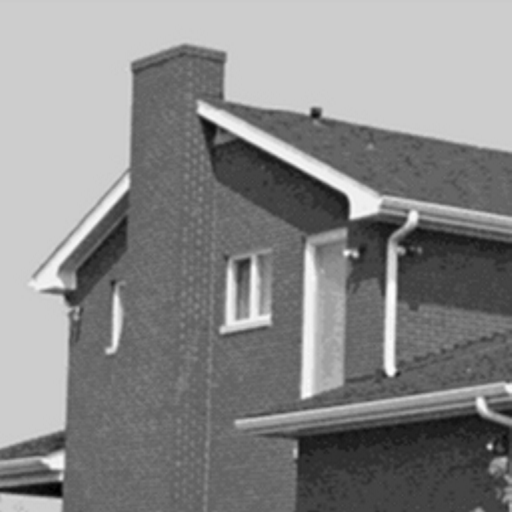

In [2]:
# Read house image
house_img = Image.open('../images/input/house.png').convert('L')
house_img

## Delete Data

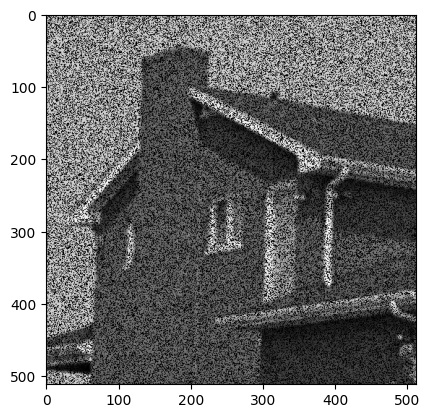

In [7]:
house_array = np.array(house_img)
m, n = np.shape(house_array)
known_ratio = 0.65 # percentage of known entries
num_known = round(known_ratio * m * n) # number of known entries
house_mask = utils.random_mask(m, n, num_known)
house_missing_data = house_array.copy()
house_missing_data[~house_mask] = 0
plt.imshow(house_missing_data, cmap='grey')
plt.show()

# Image Completion

## Alternating Projection

In [4]:
rank = int(min(m, n)/5)
alt_proj_house_completion = matrix_completion.alternating_projection(house_missing_data, house_mask, rank, n_iters=500)

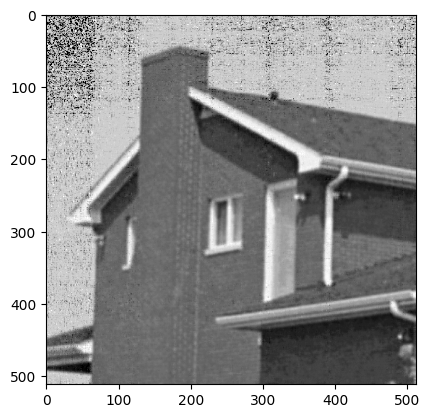

In [5]:
plt.imshow(alt_proj_house_completion, cmap='grey', vmin=0, vmax=255)
plt.show()

## 